#Desafio - Saída de funcionários de assistência médica

Os dados desse desafio são sintéticos e baseados no conjunto de dados do IBM Watson para saída de funcionários. As funções e os departamentos dos funcionários foram alterados para refletir o domínio da saúde. Além disso, os resultados conhecidos de alguns funcionários foram alterados para ajudar a aumentar o desempenho dos modelos de ML.

###Problema a ser resolvido

O seu desafio é utilizar esse conjunto de dados para predizer quando uma pessoa sairá da área médica (attrition) e quais são os fatores relevantes para identificar essa possível saída.
Quem faz mais hora extra costuma sair mais? Tem relação com o salário? Quais outros fatores são relevantes?
Descrição do dataset
Link para o dataset: https://drive.google.com/file/d/1Teaf1YEnGOsuxWMHJOd-W5sgOPPMAojQ/view?usp=sharing


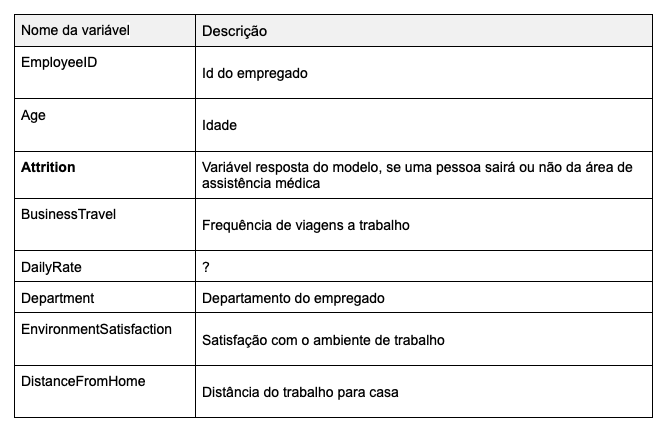

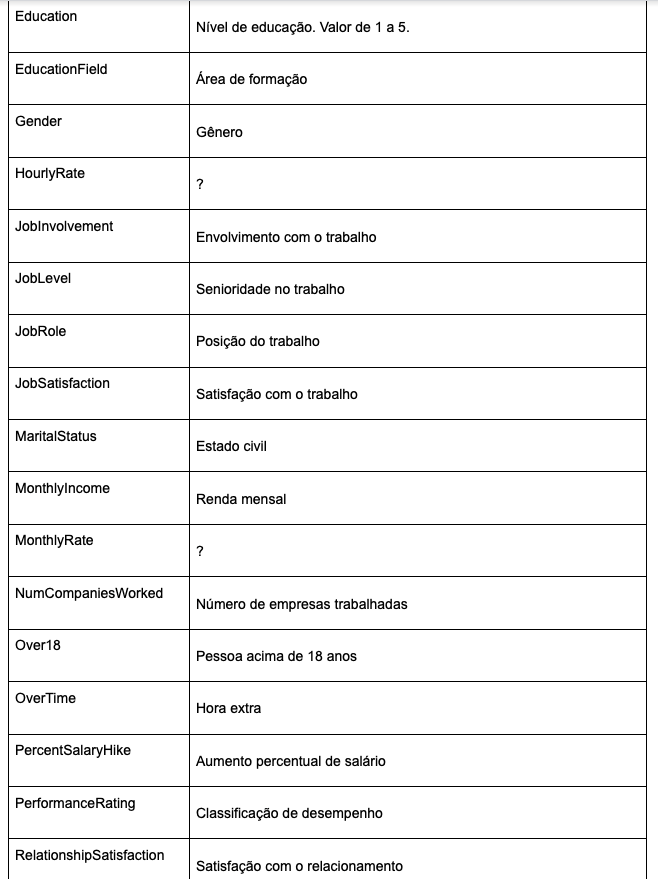

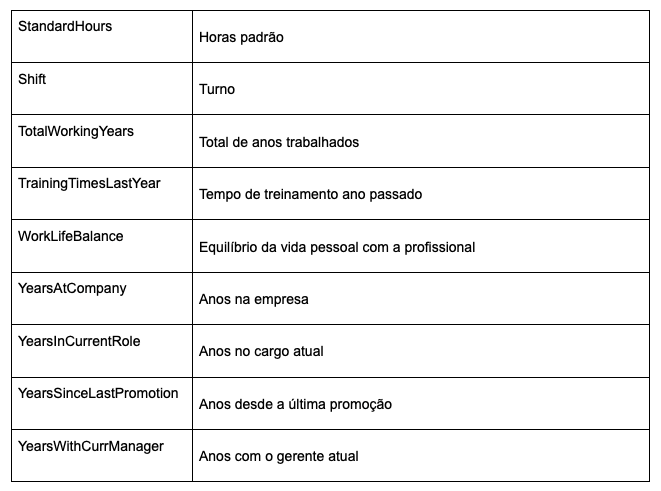

In [1]:
#Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import altair as alt
from sklearn.metrics import classification_report

In [2]:
#Carregando a base de dados do drive, para facilitar a análise
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados = pd.read_csv("/content/drive/MyDrive/watson_healthcare_modified.csv")

In [4]:
#Verificando as primeiras linhas da base de dados
dados.head()

EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8   
1                         4            80      1                 10   
2                         2            80      0                  7   
3                         3            80      0                  8   
4                         4            80      1                  6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                      0               1               6                  4   
1                      3               3              10                  7   
2                      3               3               0                  0   
3                      3               3               8                  7   
4                      3               3               2                  2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 35 columns]

In [5]:
#Sumarizando os dados
dados.describe()

EmployeeID          Age    DailyRate  DistanceFromHome    Education  \
count  1.676000e+03  1676.000000  1676.000000       1676.000000  1676.000000   
mean   1.456796e+06    36.866348   800.557876          9.221957     2.907518   
std    2.487486e+05     9.129126   401.594438          8.158118     1.025835   
min    1.025177e+06    18.000000   102.000000          1.000000     1.000000   
25%    1.235832e+06    30.000000   465.000000          2.000000     2.000000   
50%    1.464606e+06    36.000000   796.500000          7.000000     3.000000   
75%    1.667992e+06    43.000000  1157.000000         14.000000     4.000000   
max    1.886378e+06    60.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count         1676.0              1676.000000  1676.000000     1676.000000   
mean             1.0                 2.714797    65.470167        2.724940   
std              0.0                 1.097534    20.207572        0.714121   
min              1.0                 1.000000    30.000000        1.000000   
25%              1.0                 2.000000    48.000000        2.000000   
50%              1.0                 3.000000    65.500000        3.000000   
75%              1.0                 4.000000    83.000000        3.000000   
max              1.0                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours        Shift  \
count  1676.000000  ...               1676.000000         1676.0  1676.000000   
mean      2.066826  ...                  2.718377           80.0     0.806086   
std       1.113423  ...                  1.078162            0.0     0.855527   
min       1.000000  ...                  1.000000           80.0     0.000000   
25%       1.000000  ...                  2.000000           80.0     0.000000   
50%       2.000000  ...                  3.000000           80.0     1.000000   
75%       3.000000  ...                  4.000000           80.0     1.000000   
max       5.000000  ...                  4.000000           80.0     3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1676.000000            1676.000000      1676.000000   
mean           11.338902               2.805489         2.766110   
std             7.834996               1.288431         0.702369   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1676.000000         1676.000000              1676.000000   
mean         7.033413            4.264916                 2.200477   
std          6.098991            3.627456                 3.229587   
min          0.000000            0.000000                 0.000000   
25%          3.000000            2.000000                 0.000000   
50%          5.000000            3.000000                 1.000000   
75%         10.000000            7.000000                 3.000000   
max         40.000000           18.000000                15.000000   

       YearsWithCurrManager  
count           1676.000000  
mean               4.135442  
std                3.559662  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000  

[8 rows x 26 columns]

In [6]:
#Verificando o tamanho da base de dados
dados.shape

(1676, 35)

In [7]:
#Verificando o tipo de variaveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [8]:
#Verificando o nome das colunas
dados.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#Verificando se existem valores faltantes
dados.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#Possui duplicatas?
dados.drop_duplicates().shape[0] == dados.shape[0]

True

In [11]:
#Verificando se o ID se repete
dados.EmployeeID.value_counts

<bound method IndexOpsMixin.value_counts of 0       1313919
1       1200302
2       1060315
3       1272912
4       1414939
         ...   
1671    1117656
1672    1152327
1673    1812428
1674    1812429
1675    1152329
Name: EmployeeID, Length: 1676, dtype: int64>

In [12]:
#Verificando os valores únicos para cada feature
def count_unique(dados):
  print("Quantidade de valores únicos para cada feature")
  for i in dados.columns:
    print(f"{i}: {dados[i].nunique()}")

count_unique(dados)

Quantidade de valores únicos para cada feature
EmployeeID: 1676
Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 5
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
Shift: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


In [13]:
#Removendo features irrelevantes, devolvendo um novo dataframe
#As colunas que tinham apenas um valor e que não faziam sentido para o modelo, com o ID
columns = ['EmployeeID','EmployeeCount', 'StandardHours', 'Over18']

df = dados.drop(columns, axis=1)

In [14]:
#Verificando os valores das colunas
print(dados['Over18'].unique())

['Y']


In [15]:
#novo dataframe
df.head()

Age Attrition     BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41        No      Travel_Rarely       1102  Cardiology                 1   
1   49        No  Travel_Frequently        279   Maternity                 8   
2   37       Yes      Travel_Rarely       1373   Maternity                 2   
3   33        No  Travel_Frequently       1392   Maternity                 3   
4   27        No      Travel_Rarely        591   Maternity                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2  Life Sciences                        2  Female  ...   
1          1  Life Sciences                        3    Male  ...   
2          2          Other                        4    Male  ...   
3          4  Life Sciences                        4  Female  ...   
4          1        Medical                        1    Male  ...   

   PerformanceRating  RelationshipSatisfaction  Shift TotalWorkingYears  \
0                  3                         1      0                 8   
1                  4                         4      1                10   
2                  3                         2      0                 7   
3                  3                         3      0                 8   
4                  3                         4      1                 6   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0               1               6                   4   
1                      3               3              10                   7   
2                      3               3               0                   0   
3                      3               3               8                   7   
4                      3               3               2                   2   

   YearsSinceLastPromotion YearsWithCurrManager  
0                        0                    5  
1                        1                    7  
2                        0                    0  
3                        3                    0  
4                        2                    2  

[5 rows x 31 columns]

In [16]:
#Separando variaveis quantitativas e qualitativas
colunas_objeto = [col for col in df.columns if df[col].dtype == 'object']
colunas_numerico = [col for col in df.columns if df[col].dtype != 'object']

In [17]:
df[colunas_numerico].describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1676.000000  1676.000000       1676.000000  1676.000000   
mean     36.866348   800.557876          9.221957     2.907518   
std       9.129126   401.594438          8.158118     1.025835   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   796.500000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1676.000000  1676.000000     1676.000000  1676.000000   
mean                  2.714797    65.470167        2.724940     2.066826   
std                   1.097534    20.207572        0.714121     1.113423   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    65.500000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1676.000000    1676.000000  ...        1676.000000   
mean          2.738663    6516.512530  ...           3.150358   
std           1.104005    4728.456618  ...           0.357529   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2928.250000  ...           3.000000   
50%           3.000000    4899.000000  ...           3.000000   
75%           4.000000    8380.250000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction        Shift  TotalWorkingYears  \
count               1676.000000  1676.000000        1676.000000   
mean                   2.718377     0.806086          11.338902   
std                    1.078162     0.855527           7.834996   
min                    1.000000     0.000000           0.000000   
25%                    2.000000     0.000000           6.000000   
50%                    3.000000     1.000000          10.000000   
75%                    4.000000     1.000000          15.000000   
max                    4.000000     3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1676.000000      1676.000000     1676.000000   
mean                2.805489         2.766110        7.033413   
std                 1.288431         0.702369        6.098991   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1676.000000              1676.000000           1676.000000  
mean             4.264916                 2.200477              4.135442  
std              3.627456                 3.229587              3.559662  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

In [18]:
df[colunas_objeto].describe()

Attrition BusinessTravel Department EducationField Gender JobRole  \
count       1676           1676       1676           1676   1676    1676   
unique         2              3          3              6      2       5   
top           No  Travel_Rarely  Maternity  Life Sciences   Male   Nurse   
freq        1477           1184        796            697    998     822   

       MaritalStatus OverTime  
count           1676     1676  
unique             3        2  
top          Married       No  
freq             777     1200

In [19]:
#Vamos avaliar nosso target
df.Attrition.value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

In [20]:
print(f"Considerando nosso conjunto de dados, {df.Attrition.value_counts()[0]/df.shape[0]*100:.2f}% dos funcionários não sairam da empresa")

Considerando nosso conjunto de dados, 88.13% dos funcionários não sairam da empresa


In [21]:
#Verificando a quantidade de saidas
alt.Chart(df).mark_bar().encode(
  x='count()',
  y='Attrition',
  color='Attrition'
)

alt.Chart(...)

In [22]:
#Em relação a idade
#A média da idade dos funcionários é de 37 anos

In [23]:
df['Age'].describe()

count    1676.000000
mean       36.866348
std         9.129126
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [24]:
#avaliando a idade dos funcionários
alt.Chart(df).mark_bar().encode(
  x=alt.X('Age'),
  y='count()',
)

alt.Chart(...)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


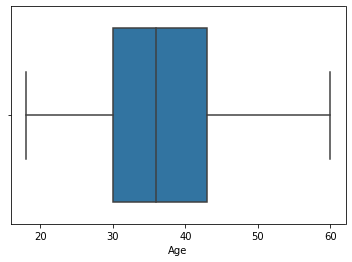

In [25]:
_ = sns.boxplot(df['Age']).set_title("")

In [26]:
#avaliando a idade e nosso target
alt.Chart(df).mark_bar().encode(
  x=alt.X('Age'),
  y='count()',
  color='Attrition'
)

alt.Chart(...)

In [ ]:
#Quem faz mais hora extra costuma sair mais? 

In [27]:
overtime = df.groupby('Attrition')['OverTime'].value_counts()
result = overtime.reset_index(name='total')
result.head()

Attrition OverTime  total
0        No       No   1140
1        No      Yes    337
2       Yes      Yes    139
3       Yes       No     60

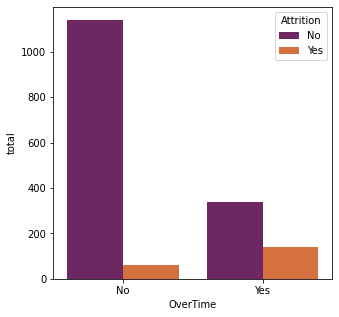

In [28]:
plt.figure(figsize=(5,5))
sns.barplot(x='OverTime', y='total', hue='Attrition', data=result, palette='inferno')

In [29]:
#Avaliando pelo gênero
df.Gender.value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

In [30]:
alt.Chart(df).mark_bar().encode(
  x='count()',
  y='Gender',
  color='Gender'
)

alt.Chart(...)

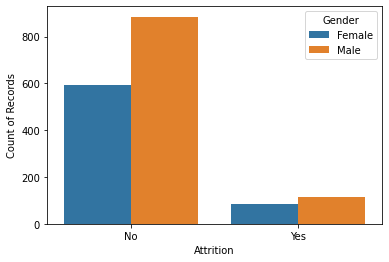

In [31]:
p = sns.countplot(data=df, x = 'Attrition', hue = 'Gender')
plt.xlabel("Attrition")
plt.ylabel("Count of Records")
plt.show()

In [32]:
#Modificando a coluna Attrition para 0 e 1
df['Attrition']= df['Attrition'].replace(['Yes','No'],['1','0'])
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition']

0       0
1       0
2       1
3       0
4       0
       ..
1671    1
1672    0
1673    0
1674    0
1675    0
Name: Attrition, Length: 1676, dtype: int64

In [33]:
#Proporção de saída por gênero
df[["Gender", "Attrition"]].groupby(['Gender']).mean()*100

Attrition
Gender           
Female  12.684366
Male    11.322645

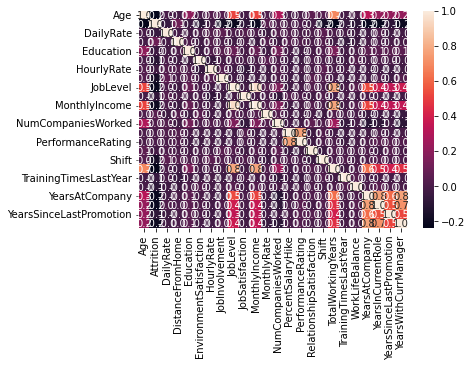

In [34]:
#Verificando a correlação entre as variaveis
df_corr= df.dropna().corr()
sns.heatmap(df_corr, annot=True, fmt='.1f')
plt.show()

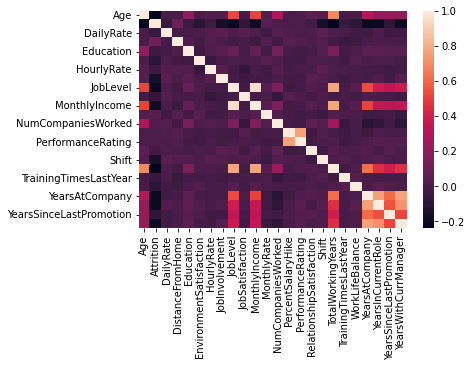

In [35]:
sns.heatmap(df.corr());

In [36]:
df.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.239984   0.001441         -0.010079   
Attrition                -0.239984   1.000000  -0.053892          0.105580   
DailyRate                 0.001441  -0.053892   1.000000         -0.009227   
DistanceFromHome         -0.010079   0.105580  -0.009227          1.000000   
Education                 0.204655  -0.038843  -0.015881          0.015937   
EnvironmentSatisfaction   0.008945  -0.101278   0.010620         -0.019730   
HourlyRate                0.034671  -0.036300   0.027128          0.026947   
JobInvolvement            0.034193  -0.166036   0.058864          0.010281   
JobLevel                  0.518333  -0.207634   0.009005         -0.023455   
JobSatisfaction          -0.015848  -0.081881   0.032115         -0.004758   
MonthlyIncome             0.511378  -0.193527   0.011030         -0.041201   
MonthlyRate               0.025837   0.045744  -0.032211          0.031672   
NumCompaniesWorked        0.296045   0.017279   0.034296         -0.024969   
PercentSalaryHike         0.007570   0.002943   0.019325          0.034172   
PerformanceRating         0.005246   0.010728   0.003353          0.020482   
RelationshipSatisfaction  0.058528  -0.020462   0.014539          0.005482   
Shift                     0.037117  -0.158322   0.054407          0.029180   
TotalWorkingYears         0.692512  -0.234182   0.009378         -0.017663   
TrainingTimesLastYear    -0.015408  -0.054836   0.001901         -0.055471   
WorkLifeBalance          -0.004878  -0.090513  -0.028549         -0.037821   
YearsAtCompany            0.319012  -0.201373  -0.026892         -0.007420   
YearsInCurrentRole        0.222655  -0.207891   0.019651          0.011448   
YearsSinceLastPromotion   0.217212  -0.086207  -0.034571         -0.000126   
YearsWithCurrManager      0.215909  -0.201087  -0.025272          0.000403   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.204655                 0.008945    0.034671   
Attrition                 -0.038843                -0.101278   -0.036300   
DailyRate                 -0.015881                 0.010620    0.027128   
DistanceFromHome           0.015937                -0.019730    0.026947   
Education                  1.000000                -0.031925    0.017996   
EnvironmentSatisfaction   -0.031925                 1.000000   -0.057505   
HourlyRate                 0.017996                -0.057505    1.000000   
JobInvolvement             0.041046                -0.007220    0.034741   
JobLevel                   0.093227                 0.008277   -0.018830   
JobSatisfaction           -0.003957                 0.001518   -0.073942   
MonthlyIncome              0.085116                 0.003372   -0.008443   
MonthlyRate               -0.019198                 0.046771   -0.025597   
NumCompaniesWorked         0.126758                 0.012640    0.029132   
PercentSalaryHike         -0.006461                -0.021612   -0.013240   
PerformanceRating         -0.020664                -0.029104   -0.000370   
RelationshipSatisfaction  -0.005750                 0.003221    0.000601   
Shift                      0.024451                 0.005283    0.051862   
TotalWorkingYears          0.143324                 0.000208    0.005988   
TrainingTimesLastYear     -0.014070                -0.017722   -0.007194   
WorkLifeBalance            0.003933                 0.027262   -0.009956   
YearsAtCompany             0.057461                -0.000448   -0.014742   
YearsInCurrentRole         0.051029                 0.012241   -0.016776   
YearsSinceLastPromotion    0.045785                 0.005866   -0.028642   
YearsWithCurrManager       0.055096                -0.012417   -0.021436   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.034193  0.518333        -0.015848  ...   
Attrition                  

In [37]:
pd.set_option('display.max_columns', None) # mostrar todas as colunas
df.head()

Age  Attrition     BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          0      Travel_Rarely       1102  Cardiology                 1   
1   49          0  Travel_Frequently        279   Maternity                 8   
2   37          1      Travel_Rarely       1373   Maternity                 2   
3   33          0  Travel_Frequently       1392   Maternity                 3   
4   27          0      Travel_Rarely        591   Maternity                 2   

   Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0          2  Life Sciences                        2  Female          94   
1          1  Life Sciences                        3    Male          61   
2          2          Other                        4    Male          92   
3          4  Life Sciences                        4  Female          56   
4          1        Medical                        1    Male          40   

   JobInvolvement  JobLevel JobRole  JobSatisfaction MaritalStatus  \
0               3         2   Nurse                4        Single   
1               2         2   Other                2       Married   
2               2         1   Nurse                3        Single   
3               3         1   Other                3       Married   
4               3         1   Nurse                2       Married   

   MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0           5993        19479                   8      Yes                 11   
1           5130        24907                   1       No                 23   
2           2090         2396                   6      Yes                 15   
3           2909        23159                   1      Yes                 11   
4           3468        16632                   9       No                 12   

   PerformanceRating  RelationshipSatisfaction  Shift  TotalWorkingYears  \
0                  3                         1      0                  8   
1                  4                         4      1                 10   
2                  3                         2      0                  7   
3                  3                         3      0                  8   
4                  3                         4      1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [38]:
df = df.drop(['Gender', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'PerformanceRating'], axis=1)
df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          0       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  \
0                4           5993        19479                   8      Yes   
1                2           5130        24907                   1       No   
2                3           2090         2396                   6      Yes   
3                3           2909        23159                   1      Yes   
4                2           3468        16632                   9       No   

   PercentSalaryHike  RelationshipSatisfaction  Shift  TotalWorkingYears  \
0                 11                         1      0                  8   
1                 23                         4      1                 10   
2                 15                         2      0                  7   
3                 11                         3      0                  8   
4                 12                         4      1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [39]:
#transformando as variaveis qualitativas
transformer = make_column_transformer(
    (OneHotEncoder(), ['OverTime']), 
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
from sklearn.model_selection import train_test_split

df = transformed_df

X = df.drop(["Attrition"], axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [42]:
from imblearn.ensemble import BalancedRandomForestClassifier

rf_model = BalancedRandomForestClassifier(n_estimators=30, max_features="auto", random_state=44, oob_score=True)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_forest.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


BalancedRandomForestClassifier(n_estimators=30, oob_score=True, random_state=44)

In [43]:
#importância das features
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
  print(f" A importância da feature '{columns[i]}' é {round(importances[i] * 100, 2)}%.")
  i += 1

 A importância da feature 'onehotencoder__x0_No' é 10.52%.
 A importância da feature 'onehotencoder__x0_Yes' é 7.06%.
 A importância da feature 'Age' é 8.39%.
 A importância da feature 'DailyRate' é 4.53%.
 A importância da feature 'DistanceFromHome' é 3.5%.
 A importância da feature 'Education' é 1.26%.
 A importância da feature 'EnvironmentSatisfaction' é 3.03%.
 A importância da feature 'HourlyRate' é 3.45%.
 A importância da feature 'JobInvolvement' é 2.41%.
 A importância da feature 'JobLevel' é 4.56%.
 A importância da feature 'JobSatisfaction' é 3.46%.
 A importância da feature 'MonthlyIncome' é 6.86%.
 A importância da feature 'MonthlyRate' é 3.69%.
 A importância da feature 'NumCompaniesWorked' é 3.21%.
 A importância da feature 'PercentSalaryHike' é 2.74%.
 A importância da feature 'RelationshipSatisfaction' é 1.55%.
 A importância da feature 'Shift' é 4.7%.
 A importância da feature 'TotalWorkingYears' é 7.28%.
 A importância da feature 'TrainingTimesLastYear' é 1.57%.
 A im

In [44]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

y_true = y_test # ground truth
y_pred = rf_model.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_true, y_pred, normalize='all')

array([[0.77137177, 0.11729622],
       [0.0139165 , 0.09741551]])

Confusion matrix, without normalization
[[388  59]
 [  7  49]]
Normalized confusion matrix
[[0.86800895 0.13199105]
 [0.125      0.875     ]]


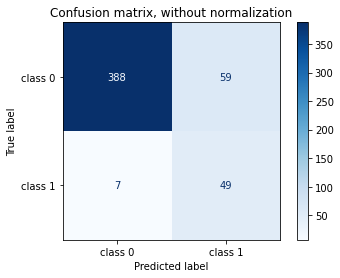

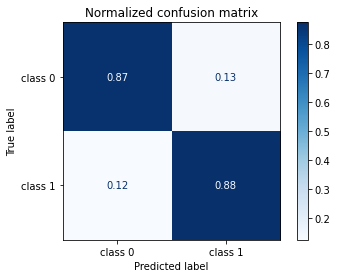

In [45]:
#Matriz de confusão
target_names = ['class 0', 'class 1']

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf_model,
        X_test,
        y_test,
        display_labels=target_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [46]:
#métricas
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.87      0.92       447
     class 1       0.45      0.88      0.60        56

    accuracy                           0.87       503
   macro avg       0.72      0.87      0.76       503
weighted avg       0.92      0.87      0.89       503

